In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [4]:
data_path = 'excel/data.xlsx'
save_path = './excel/extract/data_imput/data_3.xlsx'

data_origin = pd.read_excel(data_path,sheet_name='表单3')
data = data_origin.iloc[:,'二氧化硅(SiO2)':]
data.head()

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,无风化,78.45,NaN,NaN,6.08,1.86,7.23,2.15,2.11,NaN,NaN,1.06,0.03,NaN,0.51
1,A2,风化,37.75,NaN,NaN,7.63,NaN,2.33,NaN,NaN,34.30,NaN,14.27,NaN,NaN,NaN
2,A3,无风化,31.95,NaN,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,NaN,NaN
3,A4,无风化,35.47,NaN,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,NaN,NaN
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,NaN


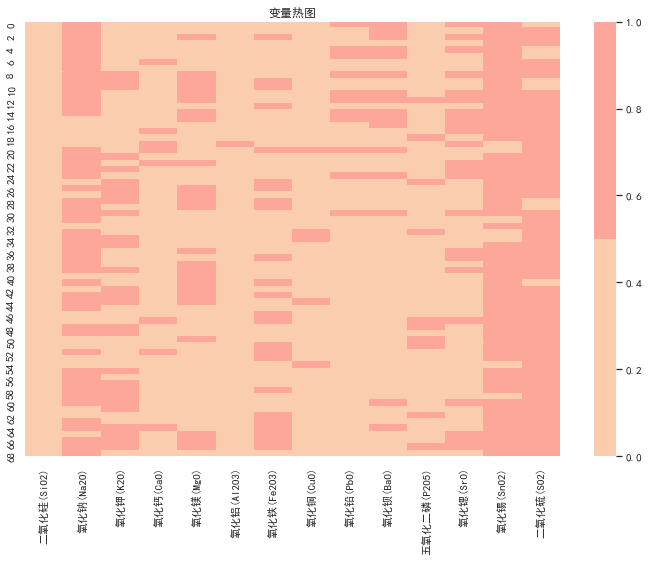

In [26]:
### 绘制缺失变量的热图
def miss_heatamp(data,title):
    cols = data.columns
    colours = ['#f9cdad', '#fca79a']  ## 第一项没缺失的颜色，第二项，缺失的颜色

    plt.figure(figsize=(12,8 ))
    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    # plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=1)
    f = sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))
    f.set_title(title)
    plt.savefig('1.png')

miss_heatamp(data,'变量热图')

             miss_num
氧化钠(Na2O)          50
氧化钾(K2O)           28
氧化钙(CaO)            8
氧化镁(MgO)           25
氧化铝(Al2O3)          1
氧化铁(Fe2O3)         24
氧化铜(CuO)            5
氧化铅(PbO)           11
氧化钡(BaO)           16
五氧化二磷(P2O5)        10
氧化锶(SrO)           23
氧化锡(SnO2)          62
二氧化硫(SO2)          61


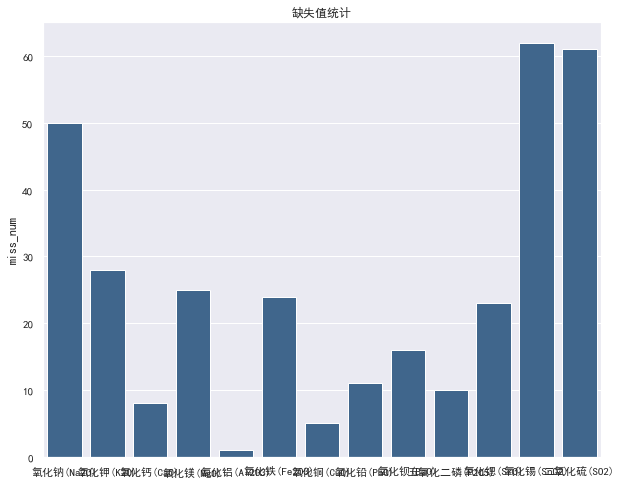

In [27]:
##### 绘制缺失变量的直方图
def miss_bar(data,title):
    '''
    data : dataframe格式的数据，行为数据，列为特征 
    title : 图表名字
    '''
    missValue2miss_num={}
    for col in data.columns:
        missing = data[col].isnull()
        num_missing = np.sum(missing)
        if num_missing > 0:  
            missValue2miss_num[col] = num_missing
    df = pd.DataFrame([missValue2miss_num])
    df.index=['miss_num']
    df = df.T
    print(df)
    
    plt.figure(figsize=(10,8 ))
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=1)

    f = sns.barplot(x=df.index,y=df['miss_num'],color='#336699')
    f.set_title(title)


miss_bar(data,'缺失值统计')

In [18]:

def rf_impute(data):
    '''
    data:dataframe格式
    '''

    copy_data = data.copy()
    miss_columns = copy_data.isnull().sum()[copy_data.isnull().sum() != 0].sort_values().index.tolist() 
    unmiss_columns = copy_data.isnull().sum()[copy_data.isnull().sum() == 0].sort_values().index.tolist() 
    for col in miss_columns:
        X_train = copy_data[copy_data[col].notnull()][unmiss_columns].values
        Y_train = copy_data[copy_data[col].notnull()][col].values
        X_test = copy_data[copy_data[col].isnull()][unmiss_columns][unmiss_columns].values
        rfr=RandomForestRegressor()
        rfr.fit(X_train,Y_train)
        predict_value = rfr.predict(X_test)
        copy_data.loc[(copy_data[col].isnull()),col] = predict_value
        unmiss_columns.append(col)
    return copy_data

imp_data = rf_impute(data)
imp_data.to_excel(save_path)
imp_data

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,3.8511,9.9900,6.3200,0.8700,3.93,1.7400,3.87,1.8062,4.6092,1.1700,0.1042,0.7421,0.3900
1,36.28,2.8848,1.0500,2.3400,1.1800,5.73,1.8600,0.26,47.4300,8.3110,3.5700,0.1900,0.5252,4.1328
2,87.05,2.3721,5.1900,2.0100,1.0582,4.06,1.1230,0.78,0.2500,2.5339,0.6600,0.1092,0.7454,1.1611
3,61.71,3.8233,12.3700,5.8700,1.1100,5.50,2.1600,5.09,1.4100,2.8600,0.7000,0.1000,0.7143,0.4258
4,65.88,3.5114,9.6700,7.1200,1.5600,6.44,2.0600,2.18,0.6980,1.3866,0.7900,0.0769,1.3745,0.3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,17.11,2.4881,0.4424,4.7962,1.1100,3.65,1.4616,1.34,58.4600,7.8008,14.1300,1.1200,0.4936,6.7890
65,49.01,2.7100,0.3713,1.1300,0.6630,1.45,0.3340,0.86,32.9200,7.9500,0.3500,0.2698,0.5539,7.7850
66,29.15,3.8434,0.2772,1.2100,0.7894,1.85,0.6768,0.79,41.2500,15.4500,2.5400,0.4571,0.5774,5.5299
67,25.42,3.7708,0.3059,1.3100,0.8178,2.18,0.7724,1.16,45.1000,17.3000,2.7852,0.4713,0.5904,5.2815
